
# **TP : CNN (LeNet, VGG, ResNet) **   
**Objectif** : Comprendre l'entraînement et l'évaluation de **trois architectures CNN classiques** (*LeNet, VGG, ResNet*) sur le dataset (**CIFAR-10**).

## **🔹 Partie 1 : Préparation des Données**
Vous allez utiliser le dataset **CIFAR-10**.


2025-03-13 11:23:56.311313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-13 11:23:56.772318: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-13 11:23:56.773852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-13 11:23:58.540393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


170498071/170498071 [==============================] - 435s 3us/step


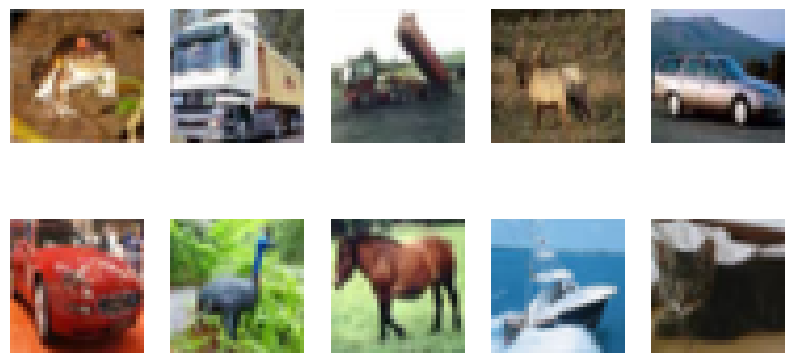

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Charger le dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalisation des images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encodage des labels en one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Afficher quelques images du dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()


## **🔹 Partie 2 : Implémentation du modèle LeNet-5**

In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_lenet():
    model = Sequential([
        Conv2D(6, (5,5), activation='relu', input_shape=(32,32,3)),  
        MaxPooling2D(pool_size=(2,2)),  
        # TO-DO: Ajoutez une deuxième couche Conv2D et une couche MaxPooling2D ici !
        Conv2D(16, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),  
        Dense(120, activation='relu'),  
        Dense(84, activation='relu'),  
        Dense(10, activation='softmax')  
    ])
    return model

lenet = create_lenet()
lenet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
lenet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 120)              

## **🔹 Partie 3 : Implémentation du modèle VGG-16**

Développé par **l’Université d’Oxford**, **VGG-16** utilise des **petits filtres 3×3** pour empiler plusieurs couches.

### **Pourquoi VGG-16 ?**
- Meilleure extraction de caractéristiques grâce à **plusieurs convolutions empilées**.
- Apporte une **meilleure généralisation** que LeNet.

📌 **Architecture :**
- **Plusieurs blocs de convolutions (3×3) + MaxPooling**
- **3 couches Dense en sortie**

**Inconvénient** : **Très coûteux en calcul**. 

In [11]:

from tensorflow.keras.applications import VGG16

def create_vgg():
    model = VGG16(include_top=True, weights=None, input_shape=(32,32,3), classes=10)
    return model

vgg = create_vgg()
vgg.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

## **🔹 Partie 4 : Implémentation du modèle ResNet-50**

In [12]:

from tensorflow.keras.applications import ResNet50

def create_resnet():
    model = ResNet50(weights=None, input_shape=(32,32,3), classes=10)
    return model

resnet = create_resnet()
resnet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       


**Vu le grand nombre de paramètres dans ResNet-50, transformez-le en ResNet-18 en conservant la même structure d’architecture :**

Définition manuelle de ResNet-18 en Keras
ResNet-18 est une version plus légère de ResNet-50. Vous pouvez le construire manuellement en utilisant des Blocs Basiques (Basic Blocks) au lieu des Blocs Goulot d'étranglement (Bottleneck Blocks) utilisés dans ResNet-50.

🔹 Structure de ResNet-18 :

Moins de couches que ResNet-50
Utilise des Blocs Basiques (2 convolutions par bloc) au lieu des Blocs Goulot d’étranglement (3 convolutions par bloc).

In [13]:
from tensorflow.keras import layers, models

def residual_block(x, filters):
    """ Basic Residual Block (2 conv layers) """
    shortcut = x
    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, (3,3), padding='same')(x)
    
    # Add shortcut connection
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    
    return x

def create_resnet18(input_shape=(224,224,3), num_classes=10):
    """ Custom ResNet-18 model """
    inputs = layers.Input(shape=input_shape)
    
    # Conv2D with strides=2 and padding='same' and activation='relu'
    x = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(inputs)
    # MaxPooling2D 3*3 with strides=2 and padding='same'
    x = layers.MaxPooling2D((3,3), strides=2, padding='same')(x)

    # 4 Residual Blocks
    for _ in range(2):
        x = residual_block(x, 64)
    x = layers.MaxPooling2D((2,2))(x)

    # Classification Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, x)
    return model

resnet18 = create_resnet18()
resnet18.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
resnet18.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 112, 112, 64)         9472      ['input_8[0][0]']             
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 56, 56, 64)           0         ['conv2d_11[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 56, 56, 64)           36928     ['max_pooling2d_8[0][0]'

## **🔹 Partie 5 : Entraînement des modèles**

In [14]:

models = {"LeNet": lenet, "VGG": vgg, "ResNet18": resnet18}

history = {}

for name, model in models.items():
    print(f"Entraînement du modèle {name}...")
    history[name] = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)


Entraînement du modèle LeNet...
Epoch 1/5
391/391 [==============================] - 7s 19ms/step - loss: 1.1539 - accuracy: 0.5889 - val_loss: 1.1916 - val_accuracy: 0.5793
Epoch 2/5
391/391 [==============================] - 7s 17ms/step - loss: 1.1108 - accuracy: 0.6056 - val_loss: 1.1727 - val_accuracy: 0.5837
Epoch 3/5
391/391 [==============================] - 7s 19ms/step - loss: 1.0744 - accuracy: 0.6191 - val_loss: 1.1455 - val_accuracy: 0.5986
Epoch 4/5
391/391 [==============================] - 8s 20ms/step - loss: 1.0431 - accuracy: 0.6300 - val_loss: 1.1246 - val_accuracy: 0.6040
Epoch 5/5
391/391 [==============================] - 7s 19ms/step - loss: 1.0150 - accuracy: 0.6426 - val_loss: 1.1214 - val_accuracy: 0.6092
Entraînement du modèle VGG...
Epoch 1/5
 41/391 [==>...........................] - ETA: 17:35 - loss: 2.3037 - accuracy: 0.1035

KeyboardInterrupt: 

In [ ]:
# ✏️ : Tâche : Modifiez le nombre d'époques, la taille du batch et le taux d'apprentissage, puis observez leur impact sur les performances.
#      batch_size = 256  # Default: 128
#      num_epochs = 10   # Default: 5

### CODE HERE ###

models = {"LeNet": lenet, "VGG": vgg, "ResNet18": resnet18}

history = {}

for name, model in models.items():
    print(f"Entraînement du modèle {name}...")
    history[name] = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256)

## **🔹 Partie 6 : Évaluation et Comparaison**

In [ ]:
for name, model in models.items():
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"{name} - Accuracy : {test_acc:.2f}")


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Faire des prédictions sur l'ensemble de test
y_pred = ...

# Convertir les probabilités en classes prédictes (en prenant la classe avec la probabilité maximale --> np.argmax)
y_pred_classes = ...

# Convertir les étiquettes réelles en classes (en prenant l'index des classes)
y_true = np.argmax(Y_test, axis=1)

# Générer le rapport de classification avec précision, rappel et F1-score
report = classification_report(y_true, y_pred_classes)

print(report)

## **🔹 Partie 7 : Analyse des Résultats**

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for name, hist in history.items():
    plt.plot(hist.history["val_accuracy"], label=name)

plt.title("Comparaison des modèles")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()
